In [1]:
from keras.models import load_model
import pickle
import cv2
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = load_model("saved_models/simple_nn.model")
lb = pickle.loads(open("output/simple_nn_lb.pickle", "rb").read())

In [3]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]

In [13]:
def predict(image):   
    output = image.copy()
    image = cv2.resize(image, (32, 32))
    
    # scale the pixel values to [0, 1]
    image = image.astype("float32") / 255.0
    
    image = image.flatten()
    image = image.reshape((1, image.shape[0]))
    
    # make a prediction on the image
    preds = model.predict(image)
    
    i = preds.argmax(axis=1)[0]
    label = lb.classes_[i]
    
    # probability on the output image
    text = "{}: {:.2f}%".format(label, preds[0][i] * 100)
    
    return text

Text(0.5, 1.0, 'Animal is: panda: 99.77%')

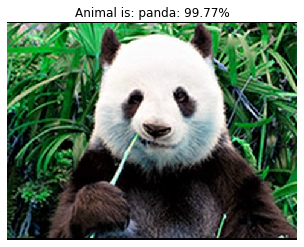

In [17]:
image_path = gui_fname()
image = cv2.imread(image_path)
animal = predict(image)
plt.imshow(image)
plt.axis('off')
plt.title('Animal is: {}'.format(animal))